In [27769]:
#Importing required libraries
#ライブリを読み込む
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27770]:
#Creating a variable that stores the filename and loading the csv into a data frame
#ファイルの名前を入れる変数を作って、CVSをデータフレームに
filename = "データの一日六月.csv"
df = pd.read_csv(filename)

In [27771]:
df.columns

Index(['Rank', 'Department', 'Code', 'ItemName', 'SalesQty', 'SalesAmount',
       'Profit', 'Share', 'CumulativeShare', 'RankClass'],
      dtype='object')

In [27772]:
df.dtypes

Rank                 int64
Department          object
Code               float64
ItemName            object
SalesQty             int64
SalesAmount          int64
Profit               int64
Share               object
CumulativeShare     object
RankClass           object
dtype: object

In [27773]:
df.isnull().sum()

Rank               0
Department         0
Code               1
ItemName           0
SalesQty           0
SalesAmount        0
Profit             0
Share              0
CumulativeShare    0
RankClass          0
dtype: int64

In [ ]:
#First look at all the information, finding outiers
#データをざっと見て、変なデータを調べる
df.describe()

,Rank,Code,SalesQty,SalesAmount,Profit
count,212.000000,2.110000e+02,212.000000,212.000000,212.000000
mean,104.547170,9.478673e+10,18.207547,20329.679245,20329.679245
std,59.062684,1.376857e+12,42.948822,44365.447040,44365.447040
min,1.000000,1.000000e+00,1.000000,0.000000,0.000000
25%,53.750000,1.095000e+02,4.000000,2640.000000,2640.000000
50%,105.500000,1.860000e+02,8.000000,7810.000000,7810.000000
75%,157.000000,3.135000e+02,17.000000,16995.000000,16995.000000
max,189.000000,2.000000e+13,477.000000,350000.000000,350000.000000


In [ ]:
#Based on min, max and salesamountstd,the dataframe is separated into four groups
#min、max、salesamountstdを使って、四つのグループに分ける。
def classify(X):
    X = str(X).lower()
    if "course" in X or "fiesta" in X or "mexico" in X or "premium" in X or "コース" in X:
        return "course"
    elif "nomihoudai" in X or "飲み放題" in X or "(f)" in X or "(p)" in X :
        return "nomihoudai"
    elif "charge" in X or "チャージ" in X:
        return "structure"
    else:
        return "product"

df["ProductType"] = df ["ItemName"].apply(classify)

In [ ]:
#Creating 4 groups, making dataframe copy of each of them
#四つのグループは「レストランのコース」「飲み放題」「チャージ」「単品」。
df_product = df[df["ProductType"]== "product"].copy()
df_course = df[df["ProductType"] == "course"].copy()
df_nomihoudai = df[df["ProductType"]== "nomihoudai"].copy()
df_structure = df[df["ProductType"] == "structure"].copy()

In [27777]:
df["ProductType"].value_counts()

ProductType
product       183
nomihoudai     26
course          2
structure       1
Name: count, dtype: int64

In [27778]:
df_product["ItemName"].nunique(), df_product.shape[0]

(179, 183)

In [ ]:
#Finding repeated products entries sold in lunch and dinner
#ランチとデイなーの両方で売られた単品の重複を見つける
repetidos = df_product["ItemName"].value_counts()
repetidos[repetidos > 1]

ItemName
F tortilla    2
C tortilla    2
コロナ           2
Arrachera     2
Name: count, dtype: int64

In [ ]:
#Unyfing product information for graphs
#単品のデータをまとめてグラフを作成する。
product_summary = (
    df_product
    .groupby("ItemName")[["SalesQty", "SalesAmount"]]
    .sum()
    .sort_values("SalesAmount", ascending=False)
    .reset_index()
)

In [ ]:
#確認する
product_summary["ItemName"].nunique(), product_summary.shape[0]

(179, 179)

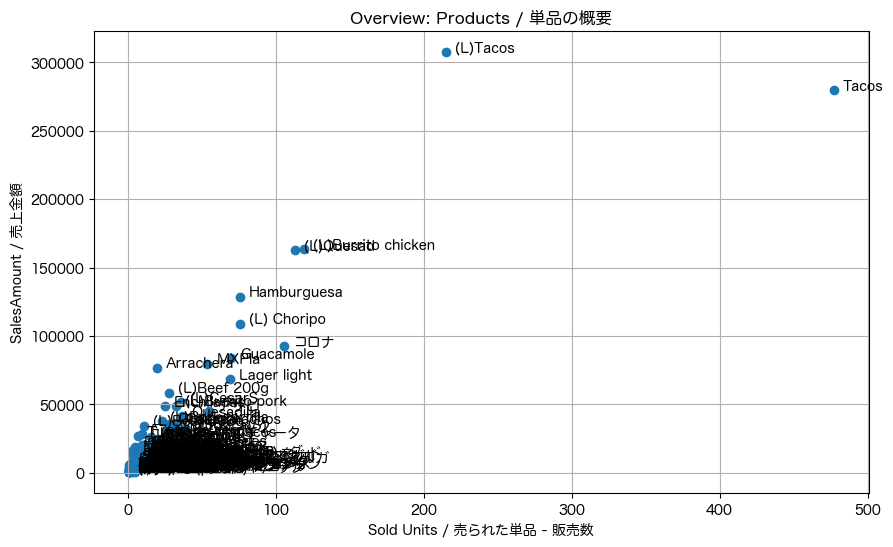

In [ ]:
#Creating a product graph to visualize (as a first glimpse) the data distribution
#データの分布が見えるように、グラフを作成する

plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'
plt.figure(figsize=(10,6))
plt.scatter(product_summary["SalesQty"], product_summary["SalesAmount"])

for i, row in product_summary.iterrows():
    plt.text(row["SalesQty"]+6, row["SalesAmount"], row["ItemName"], fontsize=10)

plt.xlabel("Sold Units / 売られた単品 - 販売数")
plt.ylabel("SalesAmount / 売上金額")
plt.title("Overview: Products / 単品の概要")
plt.grid(True)
plt.show()

In [27783]:
#Pareto:Marking the products that account for 80% of sales
#売上の８０％を占める単品
product_summary["Share"] = product_summary["SalesAmount"] / product_summary["SalesAmount"].sum()
product_summary["CumulativeShare"] = product_summary["Share"].cumsum()
product_summary["ParetoClass"] = product_summary["CumulativeShare"].apply(lambda x: "80%" if x <= 0.8 else "20%")

In [27784]:
#How many products make up 80% of sales?
fila_80 = product_summary[product_summary["CumulativeShare"] >= 0.8].index[0]
total_productos = product_summary.shape[0]
porcentaje_productos_80 = ((fila_80 + 1) / total_productos) * 100
print(f"{porcentaje_productos_80:.1f}% of the products account 80% sales")
print(f"売上の８０％は単品の{porcentaje_productos_80:.1f}%から生まれています")

33.5% of the products account 80% sales
売上の８０％は単品の33.5%から生まれています


In [ ]:
#Making sure the information is correct
#確認する
print(product_summary[["ItemName", "SalesAmount", "Share", "CumulativeShare", "ParetoClass"]])

               ItemName  SalesAmount     Share  CumulativeShare ParetoClass
0              (L)Tacos       307450  0.087829         0.087829         80%
1                 Tacos       279565  0.079863         0.167693         80%
2    (L)Burrito chicken       163625  0.046743         0.214435         80%
3             (L)Quesad       163020  0.046570         0.261005         80%
4           Hamburguesa       128810  0.036797         0.297802         80%
..                  ...          ...       ...              ...         ...
174    SP drink(precio)          660  0.000189         0.999353         20%
175          (H) グラスビール          660  0.000189         0.999541         20%
176          (H) レモンサワー          550  0.000157         0.999698         20%
177         Lunch salsa          550  0.000157         0.999855         20%
178          F tortilla          506  0.000145         1.000000         20%

[179 rows x 5 columns]


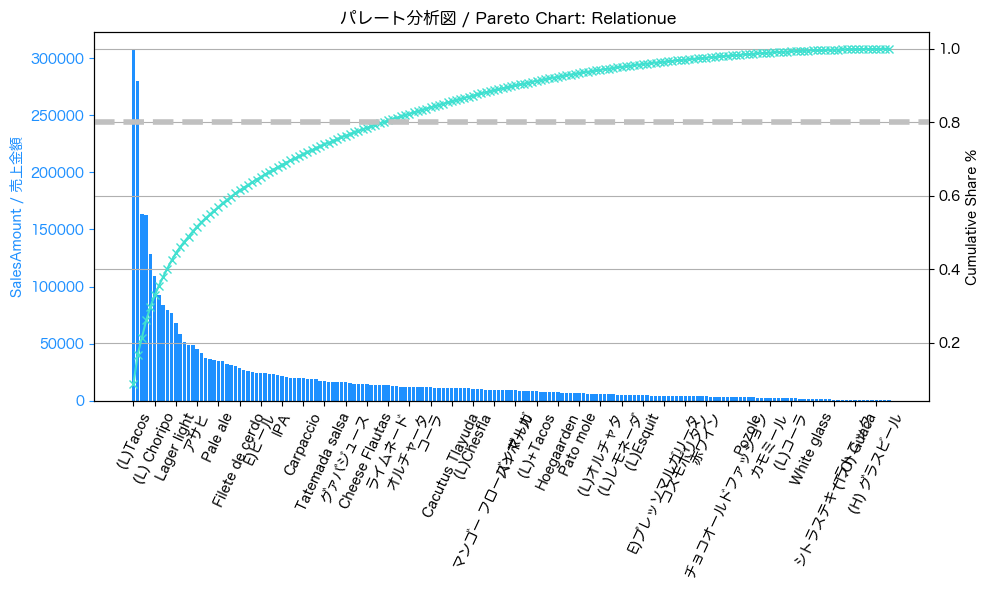

In [ ]:
#Making the chart which shows pareto principle, fewer products lead most of the sales volume
#パレート分析図は、売上の大部分が少数の単品を占める
fig, ax1 = plt.subplots(figsize=(10,6))
#Products and their salesamounts (グラフの左側)
ax1.bar(product_summary["ItemName"], product_summary["SalesAmount"], color="dodgerblue")
ax1.set_ylabel("SalesAmount / 売上金額", color="dodgerblue")
ax1.tick_params("y", colors="dodgerblue")
ax1.set_xticks(range(0, len(product_summary), 5))
ax1.set_xticklabels(product_summary["ItemName"][::5], rotation=65)
#Products and their cumulativeshare (グラフの右側)
ax2 = ax1.twinx()
ax2.plot(product_summary["ItemName"], product_summary["CumulativeShare"], color="turquoise", marker="x")
ax2.axhline(0.8, color="silver", linestyle="--", linewidth=4) 
ax2.set_ylabel("Cumulative Share %", color="black")
#Details
plt.title("パレート分析図 / Pareto Chart: Relationue ")
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
#Classifying products based on their medians (not affected by outliers) (SalesQty and SalesAmount)
#売上金額と販売数の中央値で単品を分類する
med_salesqty = product_summary["SalesQty"].median()
med_salesamount = product_summary["SalesAmount"].median()
def clasificar_producto(valor):
    if valor["SalesQty"] >= med_salesqty and valor["SalesAmount"] >= med_salesamount:
        return "StarProduct - 最高の単品"
    elif valor["SalesQty"] >= med_salesqty and valor["SalesAmount"] < med_salesamount:
        return "LowProfit - 低い利益"
    elif valor["SalesQty"] < med_salesqty and valor["SalesAmount"] >= med_salesamount:
        return "HiddenPremium - 隠れ優良単品"
    else:
        return "Atriskofremoval - リスク候補の単品"
product_summary["ProductType"] = product_summary.apply(clasificar_producto, axis=1)

In [27788]:
print(med_salesamount)

9240.0


In [27789]:
product_summary["ProductType"].value_counts()

ProductType
StarProduct - 最高の単品           79
Atriskofremoval - リスク候補の単品    76
HiddenPremium - 隠れ優良単品        12
LowProfit - 低い利益              12
Name: count, dtype: int64

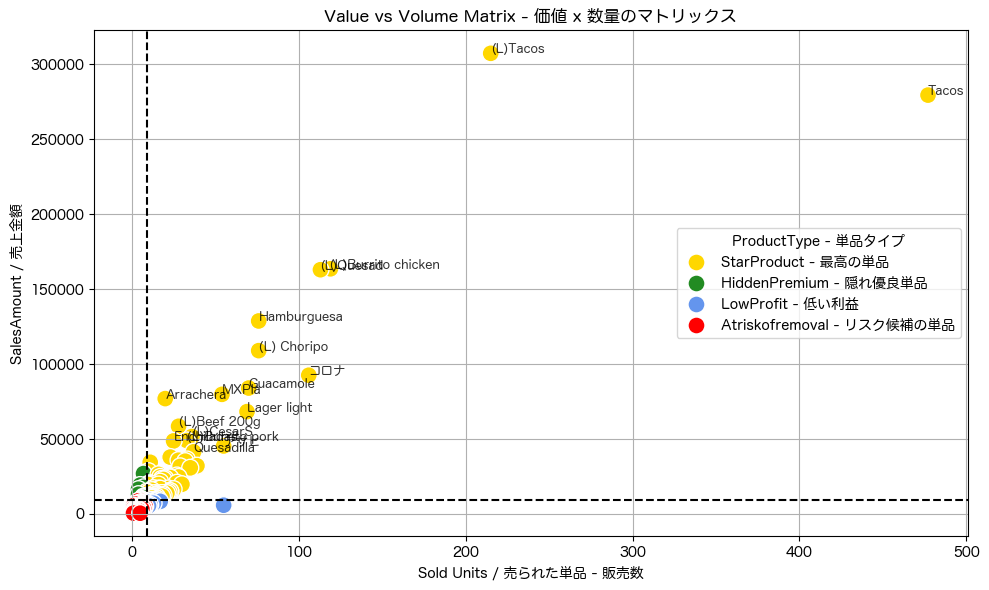

In [ ]:
#Creating the matrix
#価値と数量のマトリックスを作成する
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=product_summary, x="SalesQty", y="SalesAmount",
    hue="ProductType",
    palette={
        "StarProduct - 最高の単品": "gold",
        "LowProfit - 低い利益": "cornflowerblue",
        "HiddenPremium - 隠れ優良単品": "forestgreen",
        "Atriskofremoval - リスク候補の単品": "red"
    },
    s=150
)
#Showing just a few names to make the graoh clear 
for i, row in product_summary[product_summary["SalesAmount"] >= 40000].iterrows():
    plt.text(
        row["SalesQty"],row["SalesAmount"],row["ItemName"], fontsize=9,
        alpha=0.8
    )
#Marking the lines that separate the four groups
plt.axvline(med_salesqty, color="black", linestyle="--", linewidth=1.5)
plt.axhline(med_salesamount, color="black", linestyle="--", linewidth=1.5)
#Details
plt.title("Value vs Volume Matrix - 価値 x 数量のマトリックス")
plt.xlabel("Sold Units / 売られた単品 - 販売数")
plt.ylabel("SalesAmount / 売上金額")
plt.legend(title="ProductType - 単品タイプ", loc="center right")
plt.grid(True); plt.tight_layout(); plt.show()

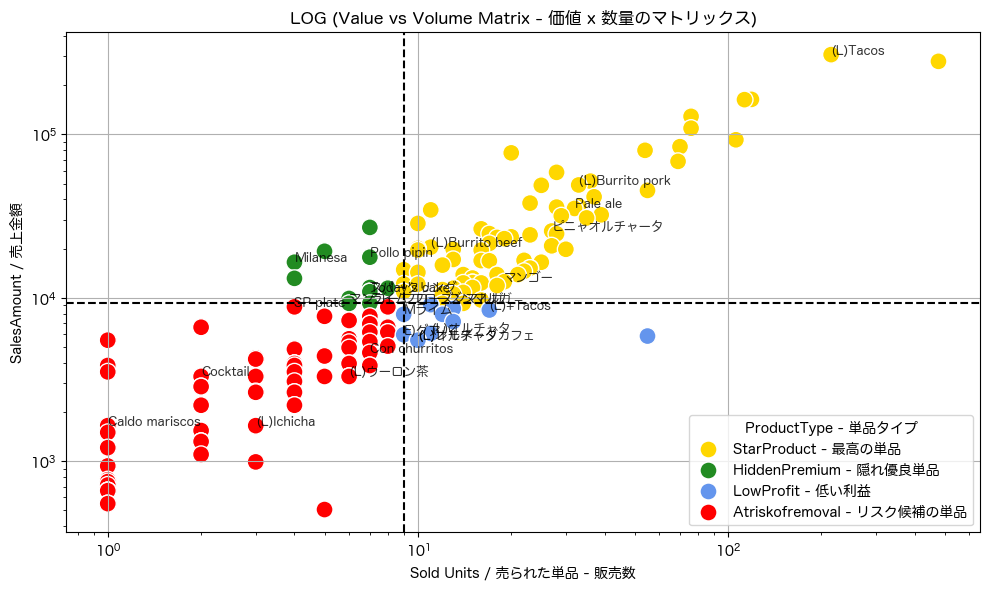

In [27791]:
#Creating the same matrix, but logarithmic scale appplied to both axes
#同じマトリックスだけど、X軸よY軸に対数スケール使用
plt.figure(figsize=(10, 6))
plt.xscale("log")
plt.yscale("log")
sns.scatterplot(
    data=product_summary, x="SalesQty", y="SalesAmount",
    hue="ProductType",
    palette={
        "StarProduct - 最高の単品": "gold",
        "LowProfit - 低い利益": "cornflowerblue",
        "HiddenPremium - 隠れ優良単品": "forestgreen",
        "Atriskofremoval - リスク候補の単品": "red"
    },
    s=150
)
#Showing just a few names to make the graph clear (6 for each group)
import random
for tipo in product_summary["ProductType"].unique():
    muestra = product_summary[product_summary["ProductType"] == tipo].sample(n=6,random_state=28)
    for _, row in muestra.iterrows():
        plt.text(row["SalesQty"], row["SalesAmount"], row["ItemName"], fontsize=9, alpha=0.8)

plt.axvline(med_salesqty, color="black", linestyle="--", linewidth=1.5)
plt.axhline(med_salesamount, color="black", linestyle="--", linewidth=1.5)
plt.title("LOG (Value vs Volume Matrix - 価値 x 数量のマトリックス)")
plt.xlabel("Sold Units / 売られた単品 - 販売数")
plt.ylabel("SalesAmount / 売上金額")
plt.legend(title="ProductType - 単品タイプ", loc="lower right")
plt.grid(True); plt.tight_layout(); plt.show()

In [ ]:
#Selecting specific departaments that contain drinks
#ドリンクがある部門を選ぶ
departament_drinks = [
    "Cocktail", "Highball & Sour", "Softdrink", "Tequila",
    "Whiskey/Brandy", "Wine/Sparkling", "Mexican cocktail",
    "Latin cocktail", "Frozen Margarita", "Beer", "Michelada","(L)Drink"
]

In [ ]:
#Creating the 3 groups: premium nomihoudai, standard nomihoudai and individual drinks
#単品のドリンク・飲み放題・プレミアム飲み放題を作成する
df_drinks = df_product[df_product["Department"].isin(departament_drinks)].copy()
df_nomi_normal = df_nomihoudai[df_nomihoudai["ItemName"].str.contains(r"\(F\)", na=False)].copy()
df_nomi_premium = df_nomihoudai[df_nomihoudai["ItemName"].str.contains(r"\(P\)", na=False)].copy()

In [ ]:
#Cleaning the names of the 3 groups to compare names easily
#三つのグールプの名前を整理する
def clean_name(name):
    return name.replace("(F)", "").replace("(P)", "").replace("(L)", "").strip()
df_drinks["CleanName"] = df_drinks["ItemName"].apply(clean_name)
df_nomi_normal["CleanName"] = df_nomi_normal["ItemName"].apply(clean_name)
df_nomi_premium["CleanName"] = df_nomi_premium["ItemName"].apply(clean_name)

In [ ]:
#Filtering the 3 dataframes and unifying them (we dont have repeated files anymore)
#三つのデータフーレムをフィルタして、まとめる
drink_summary = df_drinks.groupby("CleanName")["SalesQty"].sum().reset_index(name="Individual Drink")
nomi_normal_summary = df_nomi_normal.groupby("CleanName")["SalesQty"].sum().reset_index(name="Regular Nomihoudai Drink")
nomi_premium_summary = df_nomi_premium.groupby("CleanName")["SalesQty"].sum().reset_index(name="Premium Nomihoudai Drink")

In [ ]:
#Creating the function for the heat map 
#関数を作成する
def make_heatmap(conjunto, column_name, title, top_n=10):
    df_top = conjunto.sort_values(column_name, ascending=False).head(top_n).copy()
    df_top["%"] = df_top[column_name] / df_top[column_name].sum()
    df_top.set_index("CleanName", inplace=True)
    
    #Heatmap
    plt.figure(figsize=(6, 4)) 
    sns.heatmap(df_top[[ "%"]], cmap="Greens", annot=True, fmt=".0%", 
                linewidths=0.8, linecolor='white', cbar=False
                )
    #Details
    plt.title(title, fontsize=12)
    plt.ylabel("ドリンク", fontsize=12)
    plt.yticks(fontsize=9)
    plt.tight_layout(); plt.show()

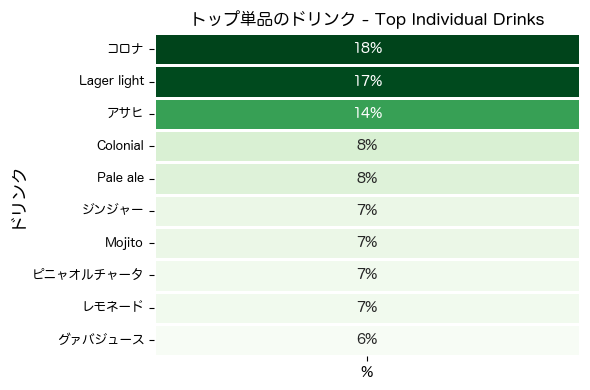

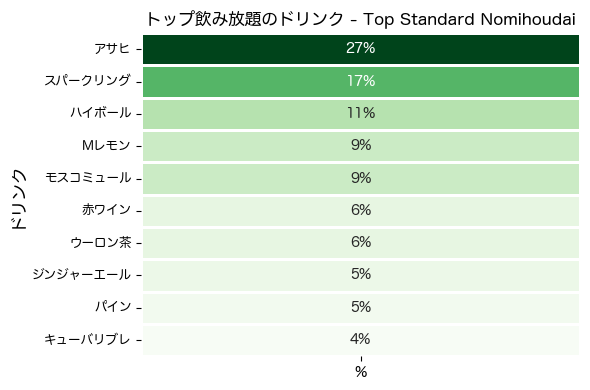

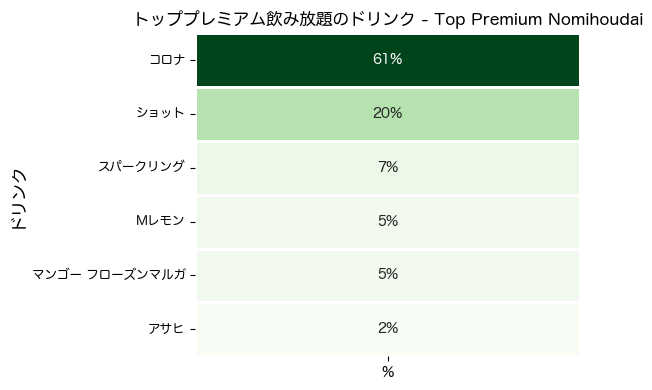

In [ ]:
#Creating Heat Maps for Standard Cosumption, Nomihouidai (regular and premium)
#単品のドリンク・飲み放題・プレミアム飲み放題のヒートマップを作成する
make_heatmap(drink_summary, "Individual Drink", "トップ単品のドリンク - Top Individual Drinks")
make_heatmap(nomi_normal_summary, "Regular Nomihoudai Drink", "トップ飲み放題のドリンク - Top Standard Nomihoudai")
make_heatmap(nomi_premium_summary, "Premium Nomihoudai Drink", "トッププレミアム飲み放題のドリンク - Top Premium Nomihoudai")

In [ ]:
#Merging the 3 groups, creating the atraction index 
#三つのグールプをまとめる
nomi_general = drink_summary.merge(nomi_normal_summary, on="CleanName", how="outer")
nomi_general = nomi_general.merge(nomi_premium_summary, on="CleanName", how="outer")
nomi_general = nomi_general.fillna(0)

nomi_general["AttractionIndex"] = (nomi_general["Regular Nomihoudai Drink"] + nomi_general["Premium Nomihoudai Drink"]) / (nomi_general["Individual Drink"])

In [27799]:
#Condition: At least one sold drink in the individual group and at least 1 sold drink in nomihoudai or premium 
#単品で１枚以上、かつ飲み放題かプレミアムで１枚以上購入がある
df_filtrado = nomi_general[
    (nomi_general["Individual Drink"] > 0) &
    ((nomi_general["Regular Nomihoudai Drink"] > 0) | (nomi_general["Premium Nomihoudai Drink"] > 0))
].copy()

In [27800]:
df_filtrado = df_filtrado.sort_values("AttractionIndex", ascending=True).copy()
print(df_filtrado)

        CleanName  Individual Drink  Regular Nomihoudai Drink  \
35           オレンジ              12.0                       1.0   
44            コーラ              22.0                       3.0   
79         ライムサワー              11.0                       3.0   
72  マンゴー フローズンマルガ               6.0                       0.0   
65            パイン              14.0                       5.0   
43            コロナ              70.0                       0.0   
28          ウーロン茶              13.0                       7.0   
23            アサヒ              55.0                      30.0   
62          ハイボール              12.0                      12.0   
14           Mレモン               7.0                      10.0   
85           赤ワイン               4.0                       7.0   
51        スパークリング               7.0                      19.0   

    Premium Nomihoudai Drink  AttractionIndex  
35                       0.0         0.083333  
44                       0.0         0.136364  
79        

/var/folders/8s/dw5cr91n73g_c6j1c4g4ls300000gn/T/ipykernel_22305/3186304284.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("Greens")(cero_one(df_filtrado["AttractionIndex"]))


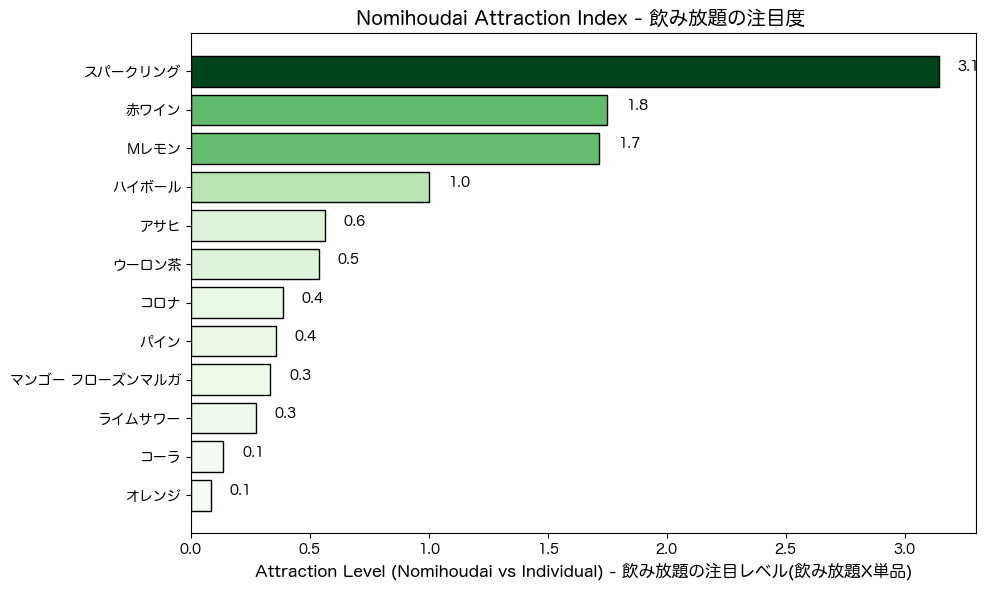

In [27801]:
#飲み放題の注目レベル
#Creating a normalization function
cero_one = plt.Normalize(df_filtrado["AttractionIndex"].min(), df_filtrado["AttractionIndex"].max())
#Applying specific tones of colors to specific numbers between 0 and 1 
colors = plt.cm.get_cmap("Greens")(cero_one(df_filtrado["AttractionIndex"]))
#Figure size
plt.figure(figsize=(10, 6))
barras = plt.barh(df_filtrado["CleanName"], df_filtrado["AttractionIndex"], color=colors, edgecolor="black")
#Text (numbers) for each bar
for barras, valor in zip(barras, df_filtrado["AttractionIndex"]):
    plt.text(valor + 0.08, barras.get_y() + barras.get_height()/2, f"{valor:.1f}", fontsize=10)
#Details
plt.title("Nomihoudai Attraction Index - 飲み放題の注目度 ", fontsize=14)
plt.xlabel("Attraction Level (Nomihoudai vs Individual) - 飲み放題の注目レベル(飲み放題X単品)", fontsize=12)
plt.tight_layout(); plt.show()

In [27802]:
df_course["UnitPrice"] = df_course["SalesAmount"] / df_course["SalesQty"]

In [ ]:
#Calculating the sum of individual food sold during dinner
#夕食中に売られた単品料理の会計を計算する
dinner_departaments = ["Cielito Favoritos", "Cold Appetizers", "Dessert",
                       "Hot Appetizers","Main Dishes","T/V/Q/G","Salada/Soups"]
df_dinnerfood = df_product[df_product["Department"].isin(dinner_departaments)]
dinner_sum = df_dinnerfood["SalesAmount"].sum()

In [ ]:
#Calculating the average ticket during dinner
#夕食中の平均チケットを計算する
num_charges = df_structure[df_structure["ItemName"] == "Charge"]["SalesQty"].values[0]
dinnerticket_average = round((dinner_sum / num_charges),)

In [27805]:
print(dinnerticket_average)
print(df_course)

3033
   Rank  Department   Code       ItemName  SalesQty  SalesAmount  Profit  \
0     1  Party Food  319.0  Mexico course        70       350000  350000   
9    10  Party Food  318.0  Fiesta course        27        94500   94500   

  Share CumulativeShare RankClass ProductType  UnitPrice  
0  8.1%            8.1%         A      course     5000.0  
9  2.2%           43.4%         A      course     3500.0  


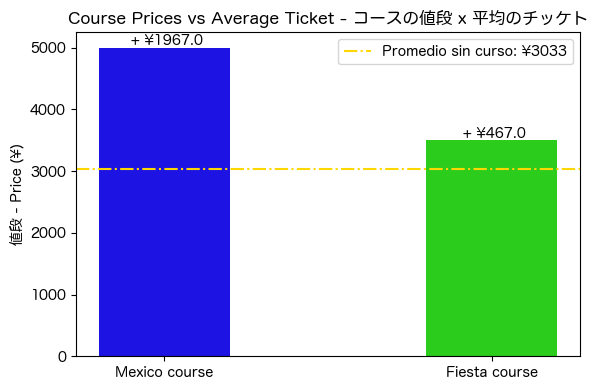

In [ ]:
#コーズの値段に比べて、平均のチッケトはどのくらい？
#Comparing course prices with the average ticket
plt.figure(figsize=(6, 4))
plt.bar(df_course["ItemName"].tolist(), df_course["UnitPrice"].tolist(), color=["#1D13E2", "#2ccc1d"],width=0.4)
plt.axhline(dinnerticket_average, color="gold", linestyle="-.", label=f"Promedio sin curso: ¥{dinnerticket_average}")
#Prices
for i, precio in enumerate(df_course["UnitPrice"]):
    delta = precio - dinnerticket_average
    plt.text(i, precio + 45, f" + ¥{delta}", ha='center', fontsize=10, color='black')
#Details
plt.title("Course Prices vs Average Ticket - コースの値段 x 平均のチッケト")
plt.ylabel("値段 - Price (¥)")
plt.legend()
plt.tight_layout();plt.show()

In [ ]:
#What if n(50) customers change their individual orders for ordering courses?
#もし50人のお客様が単品を注文する代わりにコースを注文するとしたら、どうなる？
new_coursecustomers = 50
#Creating the table // 対比の表を作成する
df_impacto = df_course[["ItemName", "UnitPrice"]].copy()
df_impacto["Dinner Average Ticket"] = dinnerticket_average
df_impacto["Potencial Extra Revenue"] = df_impacto["UnitPrice"] - dinnerticket_average
df_impacto["New Costumers"] = new_coursecustomers
df_impacto["Estimated Adittional Revenue"] = df_impacto["Potencial Extra Revenue"] * new_coursecustomers
#Rounding numbers #四捨五入する
redondear = ["UnitPrice", "Potencial Extra Revenue", "Estimated Adittional Revenue", "Dinner Average Ticket"]
df_impacto[redondear] = df_impacto[redondear].astype(int)

In [27808]:
from IPython.display import display
display(df_impacto)

,ItemName,UnitPrice,Dinner Average Ticket,Potencial Extra Revenue,New Costumers,Estimated Adittional Revenue
0,Mexico course,5000,3033,1967,50,98350
9,Fiesta course,3500,3033,467,50,23350


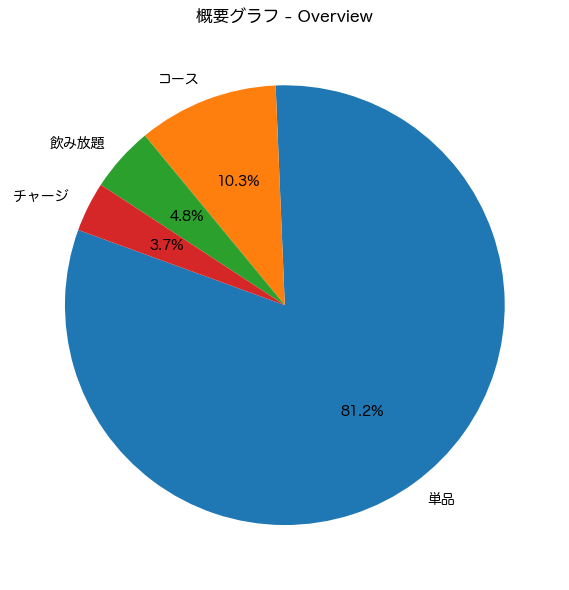

In [ ]:
#概要のグラフを作成する
#Overview: Unifying all the information in one graph 
valores = [
    df_product["SalesAmount"].sum(),
    df_course["SalesAmount"].sum(),
    df_nomihoudai["SalesAmount"].sum(),
    df_structure["SalesAmount"].sum()
]
labels = ["単品", "コース", "飲み放題", "チャージ"]

plt.figure(figsize=(6,6))
plt.pie(valores, labels=labels, autopct="%1.1f%%", startangle=160)
plt.title("概要グラフ - Overview")
plt.tight_layout(); plt.show()